In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
from matplotlib import font_manager as fm

In [9]:
amg_sizes = np.array([5010751, 14071093, 38347861, 86504155, 197995635, 451641965])
laghos_sizes = np.array([6532465, 14075025, 30314545, 62793585, 130060465, 269365745])

amg_size_times = np.array([11.2439240615, 19.9188183943, 46.3342483838, 99.4624336561, 222.590481043, 676.460336765])
laghos_size_times = np.array([8.62244359652, 17.318889459, 35.0547071298, 70.2734065056, 143.473315795, 294.314337015])

amg_comm_times = np.array([1.525463914871216, 4.317280054092407, 11.495452737808227, 29.431137323379517, 62.73297595977783])
laghos_comm_times = np.array([1.349111557006836, 2.782898712158203, 6.743440866470337, 15.441763639450073, 31.383409833908082])

cores = np.array([1, 2, 4, 8, 16, 32, 64, 128])

amg_core_times = np.array([1736.03559772, 897.748303413, 548.13571167, 306.436924775, 196.923132022, 127.658192555, 104.765719016, 101.521100601])
laghos_core_times = np.array([1118.48795096, 586.082317511, 327.978140354, 186.759891987, 119.78365167, 90.7158799171, 77.3409673373, 75.0570760568])

In [10]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

plt.clf()
gca().yaxis.grid(linestyle='dashed')
gca().spines['left'].set_color('#606060')
gca().spines['bottom'].set_color('#606060')

plt.clf()

font_entry = fm.FontEntry( fname = './gillsans.ttf',name='gill-sans')
fm.fontManager.ttflist.insert(0, font_entry) 
plt.rcParams['font.family'] = font_entry.name

plt.xlabel("Number of rows in DataFrame", fontsize=20)
plt.ylabel("Runtime (s)", fontsize=20)

plt.xscale("log")
plt.yscale("log")

plt.suptitle("Performance of Finch operations", size=20, y=0.95) 

plt.plot(amg_sizes[0:5], amg_size_times[0:5], label="Reading AMG trace", color="blue", marker="s", markeredgecolor="blue", clip_on=True, linestyle="dotted")
plt.plot(laghos_sizes[0:5], laghos_size_times[0:5], label="Reading Laghos trace", color="red", marker="^", markeredgecolor="red", clip_on=True, linestyle="solid")

plt.plot(amg_sizes[0:5], amg_comm_times, label="AMG comm_matrix", color="green", marker="s", markeredgecolor="green", clip_on=True, linestyle="dotted")
plt.plot(laghos_sizes[0:5], laghos_comm_times, label="Laghos comm_matrix", color="orange", marker="^", markeredgecolor="orange", clip_on=True, linestyle="solid")

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("dataframe_row_times.pdf", dpi = 300)

plt.show()

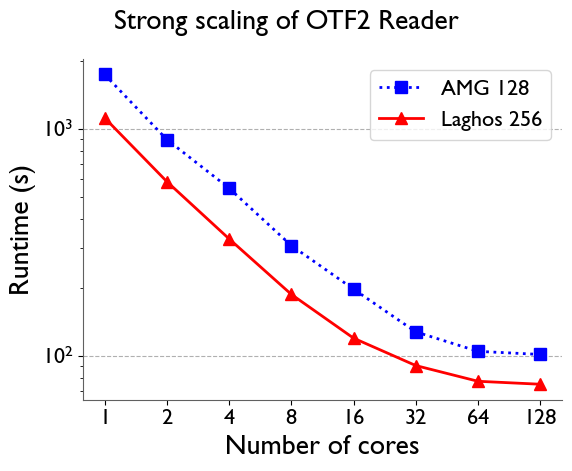

In [17]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

plt.clf()
gca().yaxis.grid(linestyle='dashed')
gca().spines['left'].set_color('#606060')
gca().spines['bottom'].set_color('#606060')

font_entry = fm.FontEntry( fname = './gillsans.ttf',name='gill-sans')
fm.fontManager.ttflist.insert(0, font_entry) 
plt.rcParams['font.family'] = font_entry.name 

plt.xlabel("Number of cores", fontsize=20)
plt.ylabel("Runtime (s)", fontsize=20)

plt.suptitle("Strong scaling of OTF2 Reader", size=20, y=0.95)

plt.plot(np.log2(cores[0:8]), amg_core_times[0:8], label="AMG 128", color="blue", marker="s", markeredgecolor="blue", clip_on=True, linestyle="dotted")
plt.plot(np.log2(cores[0:8]), laghos_core_times[0:8], label="Laghos 256", color="red", marker="^", markeredgecolor="red", clip_on=True, linestyle="solid")

plt.xticks(np.log2(cores[0:8]), labels=["1", "2", "4", "8", "16", "32", "64", "128"])
plt.yscale("log")

plt.legend()
plt.tight_layout()

plt.savefig("core_times.pdf", dpi = 300)

plt.show()

In [12]:
y = [[0.08988809585571289, 0.19871859550476073, 0.4050722599029541, 0.9195715427398682, 1.9066444873809814],
     [0.017580413818359376, 0.03338379859924316, 0.06403226852416992, 0.13689279556274414, 0.2759833812713623],
     [0.0974968433380127, 0.20098657608032228, 0.38356800079345704, 0.8512667179107666, 1.7816803932189942],
     [0.02124013900756836, 0.053156471252441405, 0.10261726379394531, 0.25164203643798827, 0.4784264087677002]]

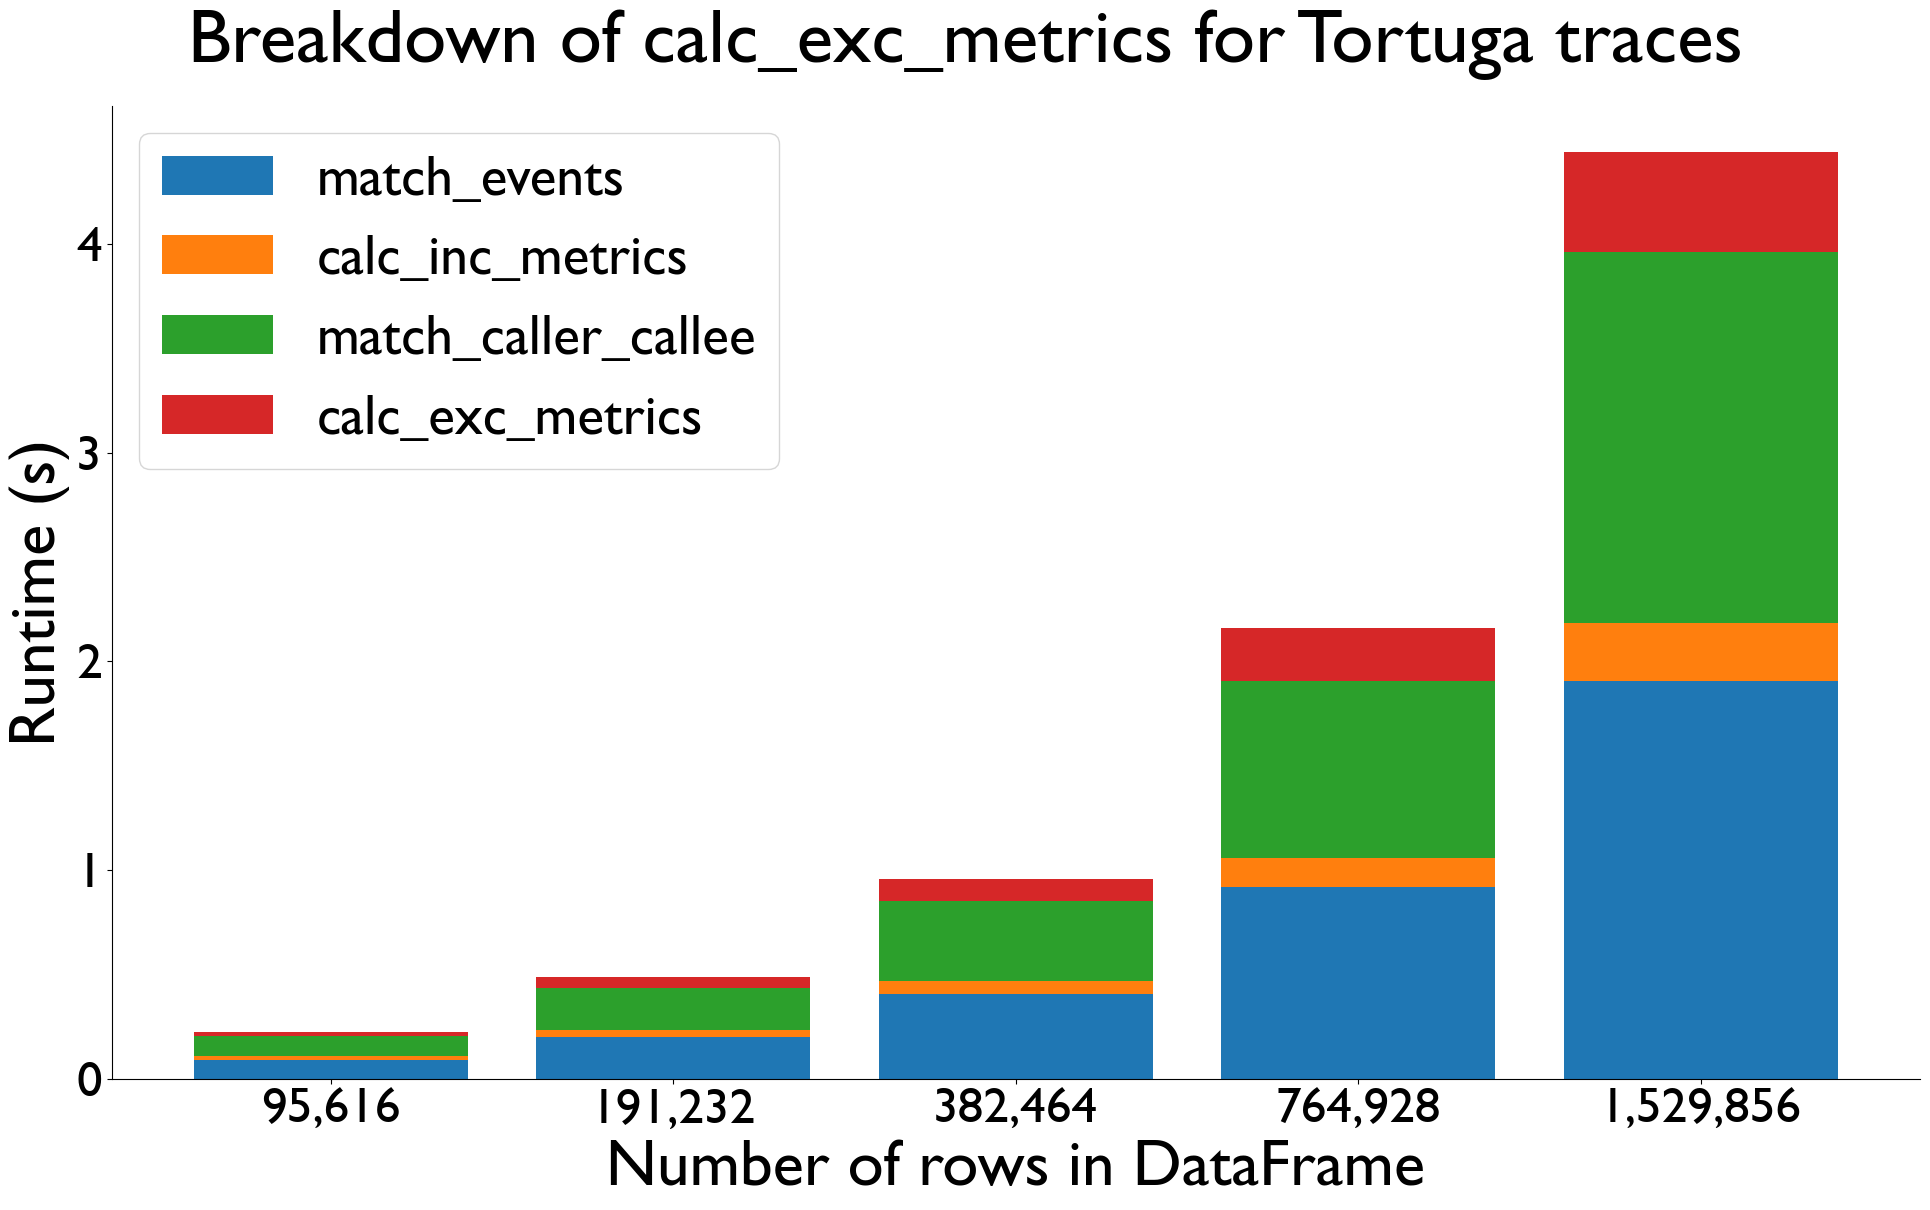

In [13]:
# curr order - match events, calc inc, match caller callee, calc exc

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 30

font_entry = fm.FontEntry( fname = './gillsans.ttf',name='gill-sans')
fm.fontManager.ttflist.insert(0, font_entry) 
plt.rcParams['font.family'] = font_entry.name

plt.rcParams["figure.figsize"] = (20, 13)

x = ["match_events", "calc_inc_metrics", "match_caller_callee", "calc_exc_metrics"]

# labels = ["16", "32", "64", "128", "256"]
labels = ["95,616", "191,232", "382,464", "764,928", "1,529,856"]

for i in range(len(y)):
    if i == 0:
        plt.bar(labels, y[i])
    else:
        plt.bar(labels, y[i], bottom = np.sum(y[:i], axis = 0))

plt.xlabel("Number of rows in DataFrame", fontsize=47)
plt.ylabel("Runtime (s)", fontsize=47)
plt.suptitle("Breakdown of calc_exc_metrics for Tortuga traces", size=55, y=0.95) 

plt.xticks(fontsize=37)
plt.yticks(fontsize=37)

plt.legend(x, fontsize = 40)
plt.tight_layout()

plt.savefig("api_times.pdf", dpi = 300)

plt.show()

In [14]:
import pandas as pd
df = pd.read_csv("memory_consumption_paper.csv")
df["peak_memory_MB"] = df["memory_consumption_KB"] / 1024
amg_read = df[(df["app"] == "amg") & (df["type"] == "read_trace")].sort_values("number_of_rows")["peak_memory_MB"].values
amg_comm = df[(df["app"] == "amg") & (df["type"] == "comm_matrix")].sort_values("number_of_rows")["peak_memory_MB"].values
laghos_read = df[(df["app"] == "laghos") & (df["type"] == "read_trace")].sort_values("number_of_rows")["peak_memory_MB"].values
laghos_comm = df[(df["app"] == "laghos") & (df["type"] == "comm_matrix")].sort_values("number_of_rows")["peak_memory_MB"].values
amg_size = df[(df["app"] == "amg") & (df["type"] == "read_trace")].sort_values("number_of_rows")["number_of_rows"].values
laghos_size = df[(df["app"] == "laghos") & (df["type"] == "read_trace")].sort_values("number_of_rows")["number_of_rows"].values

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.pyplot import gca
import matplotlib as mpl
from cycler import cycler
import math

def set_aspect_ratio(ratio=3 / 5, logx=None, logy=None):
    xleft, xright = gca().get_xlim()
    print("xleft: ", xleft)
    print("xright: ", xright)
    if logx is not None:
        print()
        xleft = math.log(xleft, logx)
        xright = math.log(xright, logx)
    ybottom, ytop = gca().get_ylim()
    print("ybottom: ", ybottom)
    print("ytop: ", ytop)
    if logy is not None:
        ytop = math.log(ytop, logy)
        ybottom = math.log(ybottom, logy)
    gca().set_aspect(abs((xright - xleft) / (ybottom - ytop)) * ratio)


xleft:  4169319.549908066
xright:  237954134.76852876

ybottom:  2039.6931813100214
ytop:  107414.61309936027


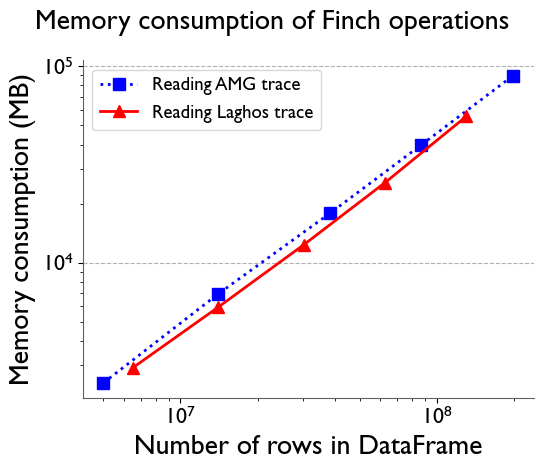

In [16]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

plt.clf()
gca().yaxis.grid(linestyle='dashed')
gca().spines['left'].set_color('#606060')
gca().spines['bottom'].set_color('#606060')

font_entry = fm.FontEntry( fname = './gillsans.ttf',name='gill-sans')
fm.fontManager.ttflist.insert(0, font_entry) 
plt.rcParams['font.family'] = font_entry.name

plt.xlabel("Number of rows in DataFrame", fontsize=20)
plt.ylabel("Memory consumption (MB)", fontsize=20)

plt.xscale("log")
plt.yscale("log")

plt.suptitle("Memory consumption of Finch operations", size=20, y=0.95) 

plt.plot(amg_size, amg_read, label="Reading AMG trace", color="blue", marker="s", markeredgecolor="blue", clip_on=True, linestyle="dotted")
plt.plot(laghos_size, laghos_read, label="Reading Laghos trace", color="red", marker="^", markeredgecolor="red", clip_on=True, linestyle="solid")

# plt.plot(amg_size, amg_comm, label="AMG comm_matrix", color="green", marker="s", markeredgecolor="green", clip_on=True, linestyle="dotted")
# plt.plot(laghos_size, laghos_comm, label="Laghos comm_matrix", color="orange", marker="^", markeredgecolor="orange", clip_on=True, linestyle="solid")

plt.legend(fontsize=13.5)
plt.tight_layout()
set_aspect_ratio(3/4, logx=10, logy=10)
plt.savefig("dataframe_row_memory.pdf", dpi = 300)

plt.show()